In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Reproducibility
np.random.seed(42)

# Generate 2 features (X1, X2)
X1 = 2 * np.random.rand(100, 1)
X2 = 3 * np.random.rand(100, 1)
X = np.hstack([X1, X2])

# True coefficients: y = 3*X1 + 5*X2 + 2 + noise
y = 3 * X1 + 5 * X2 + 2 + np.random.randn(100, 1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Transform to include interaction terms (e.g. X1^2, X2^2, X1*X2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)

# Test transformation
X_test_poly = poly_features.transform(X_test)
y_poly_pred = poly_reg.predict(X_test_poly)

print("MSE (Polynomial Regression):", mean_squared_error(y_test, y_poly_pred))


MSE (Polynomial Regression): 0.8913630172343853


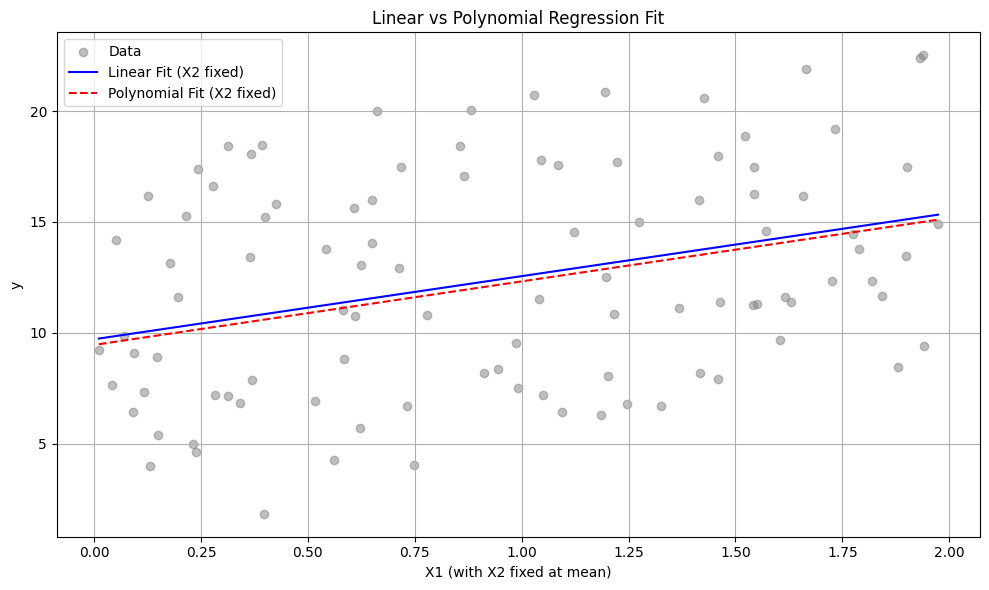

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

x1_range = np.linspace(X1.min(), X1.max(), 100).reshape(-1, 1)
x2_fixed = np.full_like(x1_range, X2.mean())
X_line = np.hstack([x1_range, x2_fixed])

# Linear predictions
y_lin_pred = lin_reg.predict(X_line)

# Polynomial predictions
X_poly_line = poly_features.transform(X_line)
y_poly_pred = poly_reg.predict(X_poly_line)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X1, y, color='gray', alpha=0.5, label='Data')
plt.plot(x1_range, y_lin_pred, color='blue', label='Linear Fit (X2 fixed)')
plt.plot(x1_range, y_poly_pred, color='red', linestyle='--', label='Polynomial Fit (X2 fixed)')
plt.xlabel("X1 (with X2 fixed at mean)")
plt.ylabel("y")
plt.title("Linear vs Polynomial Regression Fit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()